In [1]:
import tyssue

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

import tyssue as ty

from tyssue.core.sheet import Sheet
from tyssue.core.generation import three_faces_sheet
from tyssue.geometry.sheet_geometry import SheetGeometry  as geom
from tyssue.draw.plt_draw import sheet_view, quick_edge_draw
from tyssue import config  

In [2]:
%pdb

Automatic pdb calling has been turned ON


In [3]:

datasets, specs = three_faces_sheet()
sheet = Sheet('3cells_2D', datasets, specs)


geom.update_all(sheet)

In [4]:
sheet.vert_df.describe().head(3)

z          x  basal_shift             y  height   rho
count  13.0  13.000000         13.0  1.300000e+01    13.0  13.0
mean    0.0   0.000000          4.0 -8.540177e-18    -4.0   0.0
std     0.0   1.172604          0.0  1.172570e+00     0.0   0.0

## Matplotlib based representation

### Custom settings

These might go in a config file latter on.

#### Ploting itself

## Epithelial sheet representation


### The  default

In [5]:
draw_specs = config.draw.sheet_spec()

#### Quick draw of the edges

This function is quite fast (for matplotlib standards - this is no GL like speeds), but color and other aspects can't be accessed by individual edges.

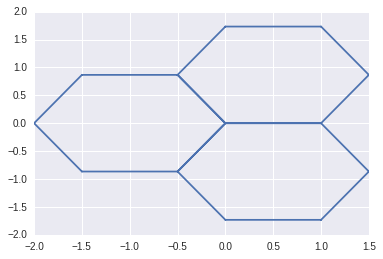

In [6]:
ax = quick_edge_draw(sheet, ['x', 'y'])

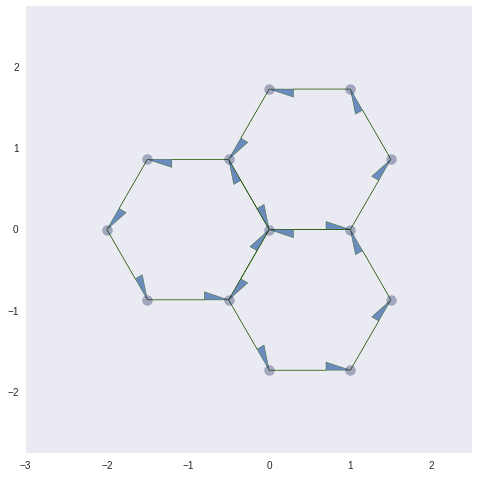

In [7]:
fig, ax = sheet_view(sheet, ['x', 'y'])


ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))
    


#### Coloring

In [8]:

## Let's add a column to sheet.vert_df
sheet.vert_df['rand'] = np.linspace(0.0, 1.0, 
                                  num=sheet.vert_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.vert_df.rand)

draw_specs['vert']['color'] = color_cmap
draw_specs['vert']['alpha'] = 0.5
draw_specs['vert']['s'] = 500

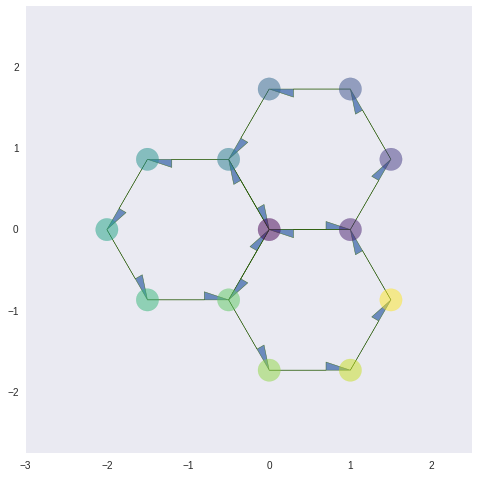

In [9]:
coords = ['x', 'y']
fig, ax = sheet_view(sheet, coords, **draw_specs)

ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))

#### Filling the cells



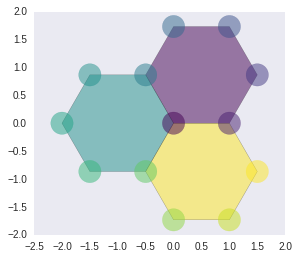

In [10]:
sheet.face_df['col'] = np.linspace(0.0, 1.0, 
                                    num=sheet.face_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.face_df.col)

draw_specs['edge']['visible'] = False

draw_specs['face']['visible'] = True
draw_specs['face']['color'] = color_cmap
draw_specs['face']['alpha'] = 0.5


fig, ax = sheet_view(sheet, coords, **draw_specs)

### Vispy based


In [11]:
from tyssue.draw.vispy_draw import vp_view

In [12]:
draw_specs['edge']['visible'] = True

draw_specs['face']['visible'] = False
draw_specs['face']['color'] = color_cmap
draw_specs['face']['alpha'] = 0.5

edge_color = np.linspace(0.0, 1.0, 
                        num=sheet.edge_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
edge_cmap = cmap(edge_color)
draw_specs['edge']['color'] = edge_cmap #[0, 0, 0, 1]
#draw_specs['edge']['color'] = [0, 0, 0, 0.2]

draw_specs['edge']['width'] = 8. * np.linspace(0.0, 1.0, 
                        num=sheet.edge_df.shape[0])

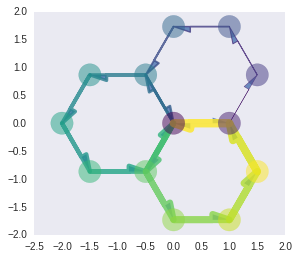

In [13]:
fig, ax = sheet_view(sheet, coords, **draw_specs)

In [14]:

draw_specs['edge']['width'] = 1.
canvas, view = vp_view(sheet, **draw_specs)

/home/guillaume/anaconda3/envs/py35/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)


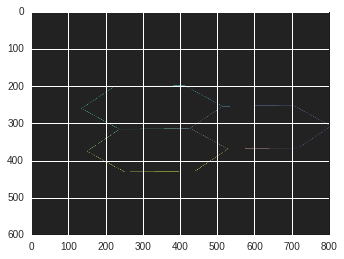

In [15]:

fig, ax = plt.subplots()
ax.imshow(canvas.render())

# Using pythreejs 

In [17]:
from tyssue.draw.threejs_draw import view_3js
from IPython.display import display


In [18]:
renderer = view_3js(sheet)


display(renderer)